In [3]:
#Let import libararies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,roc_auc_score

In [5]:
#loading dataset from csv to pandas datafram
data = pd.read_csv(r"C:\Users\bharathi.v04\Downloads\DS\diabetes2.csv")

In [6]:
#print first 5 rows of data
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
data.shape

(768, 9)

C:\Users\bharathi.v04\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bharathi.v04\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bharathi.v04\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

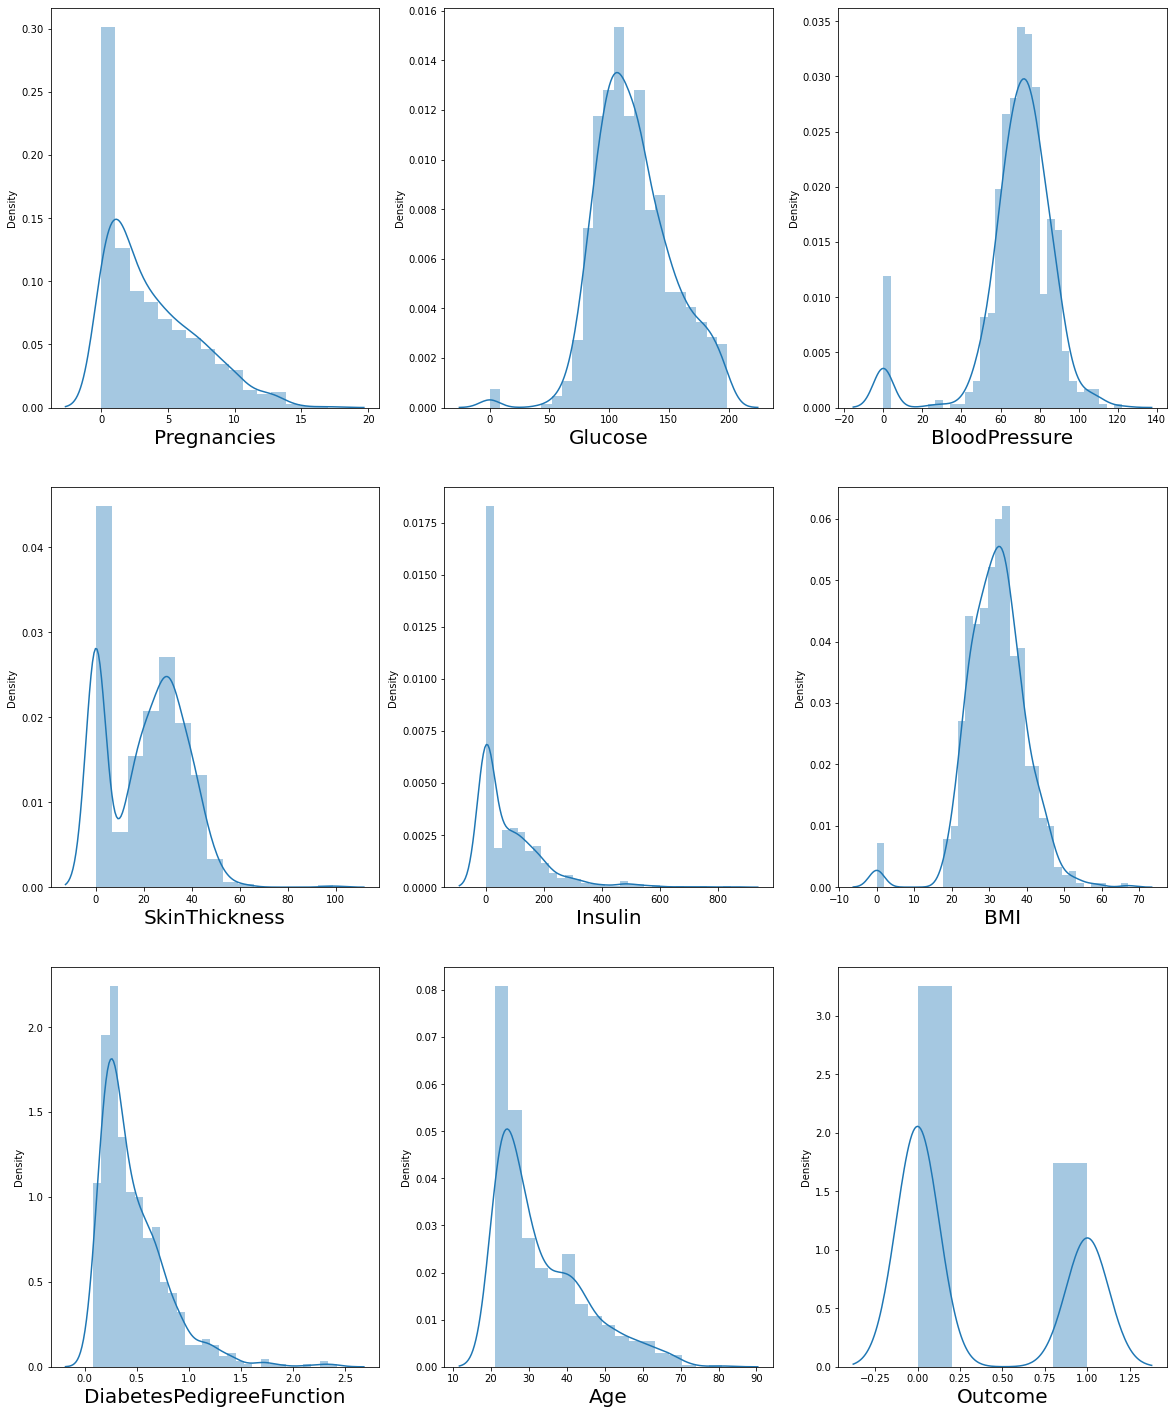

In [11]:
#Lets see how data is distributed for every column
plt.figure(figsize=(20,25),facecolor='white')
plotnumber =1

for column in data:
    if plotnumber<=9:  #as the columns are 9
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

As we can see skewness in data lets deal with it

In [16]:
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())

data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())

data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())

data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())

data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())

C:\Users\bharathi.v04\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bharathi.v04\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bharathi.v04\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

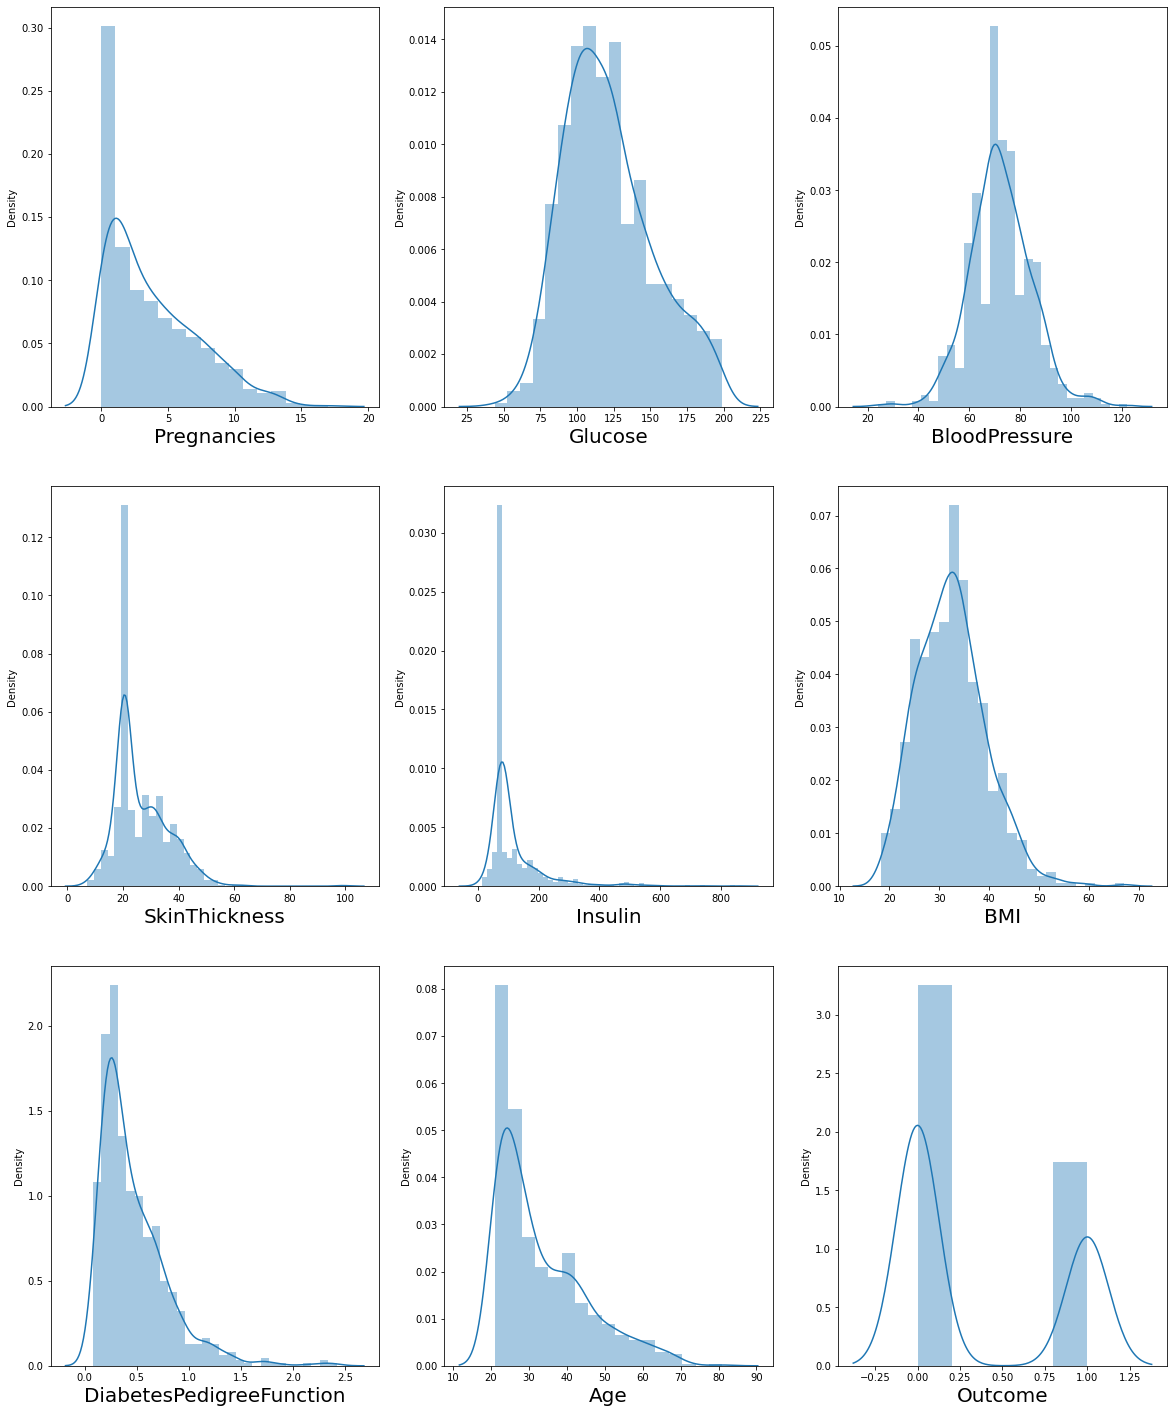

In [19]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9:  #as the columns are 9
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

### Separating features and target

In [20]:
X = data.drop(columns='Outcome',axis=1)
Y = data['Outcome']

### Standarization 

In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
X_train,X_test,Y_train,Y_test = train_test_split(X_scaled,Y,test_size=0.2,random_state=355)

In [25]:
print(X.shape,X_train.shape,X_test.shape)

(768, 8) (614, 8) (154, 8)


In [26]:
log_reg = LogisticRegression()

In [27]:
log_reg.fit(X_train,Y_train)

LogisticRegression()

In [31]:
# Accuracy on the training data
X_train_prediction = log_reg.predict(X_train)
training_data_accuracy = accuracy_score(Y_train,X_train_prediction)
print("The accuracy on training data is: ",round(training_data_accuracy*100,2),'%')

The accuracy on training data is:  78.18 %


In [32]:
#Accuracy on the test data
X_test_prediction = log_reg.predict(X_test)
test_data_accuracy = accuracy_score(Y_test,X_test_prediction)
print("The accuracy on the test data is ",round(test_data_accuracy*100,2),'%')

The accuracy on the test data is  75.32 %


### Confusion Matrix

C:\Users\bharathi.v04\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


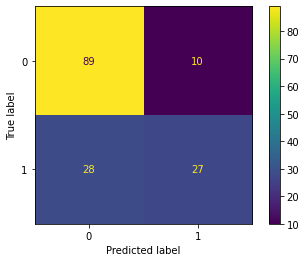

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report, roc_auc_score, plot_roc_curve
cf_matrix = confusion_matrix(Y_test,X_test_prediction)
plot_confusion_matrix(log_reg, X_test, Y_test)
plt.show()

In [37]:
print(classification_report(Y_test,X_test_prediction))

              precision    recall  f1-score   support

           0       0.76      0.90      0.82        99
           1       0.73      0.49      0.59        55

    accuracy                           0.75       154
   macro avg       0.75      0.69      0.71       154
weighted avg       0.75      0.75      0.74       154

